# E12 Project - 닮은 연예인 찾기

In [1]:
import face_recognition
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
matplotlib.font_manager._rebuild()

## 경로 설정

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/male_images'
file_list = os.listdir(dir_path)

## 필요한 함수 정의

In [3]:
# 이미지 파일에서 얼굴 영역을 가져오는 함수
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face


# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    
    # 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
    def get_face_embedding(face):
        return face_recognition.face_encodings(face)
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict


# 두 이미지(사람이름) 사이의 L2 임베딩 벡터 거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


def get_nearest_face(name, top=11):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    _list = []
    for i in range(top):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            _list.append(sorted_faces[i][0])
            
    return _list

In [4]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

## 임베딩

In [5]:
embedding_dict = get_face_embedding_dict(dir_path)

# 비슷한 사람 출력하기
### jm0.jpg와 비슷한 사람 10명 출력

In [6]:
_list = get_nearest_face('jm0')

순위 1 : 이름(jm3), 거리(0.300370396311082)
순위 2 : 이름(jm2), 거리(0.3264409409215605)
순위 3 : 이름(jm1), 거리(0.3746284749201747)
순위 4 : 이름(fake_jm), 거리(0.3924181330653342)
순위 5 : 이름(하현우), 거리(0.4510638182236278)
순위 6 : 이름(성시경), 거리(0.45433323604164166)
순위 7 : 이름(dad3), 거리(0.45688524028916166)
순위 8 : 이름(박성호), 거리(0.4636359455382633)
순위 9 : 이름(봉준호), 거리(0.4645418668075303)
순위 10 : 이름(이종석), 거리(0.4673546424023874)


### 확장자 붙여주기

In [7]:
img_list = []
for x in range(len(_list)):
    for y in range(len(file_list)):
        if _list[x] in file_list[y]:
            img_list.append(file_list[y])
            break
            
img_list

['jm3.jpg',
 'jm2.jpg',
 'jm1.JPG',
 'fake_jm.jpg',
 '하현우.jpg',
 '성시경.jpg',
 'dad3.png',
 '박성호.jpg',
 '봉준호.jpg',
 '이종석.jpeg']

## 기준 사진 출력

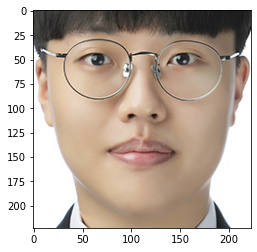

In [9]:
image_path = dir_path + '/' + 'jm0.jpg'
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## 가장 비슷한 사진 10개 출력 with the rank and the file name

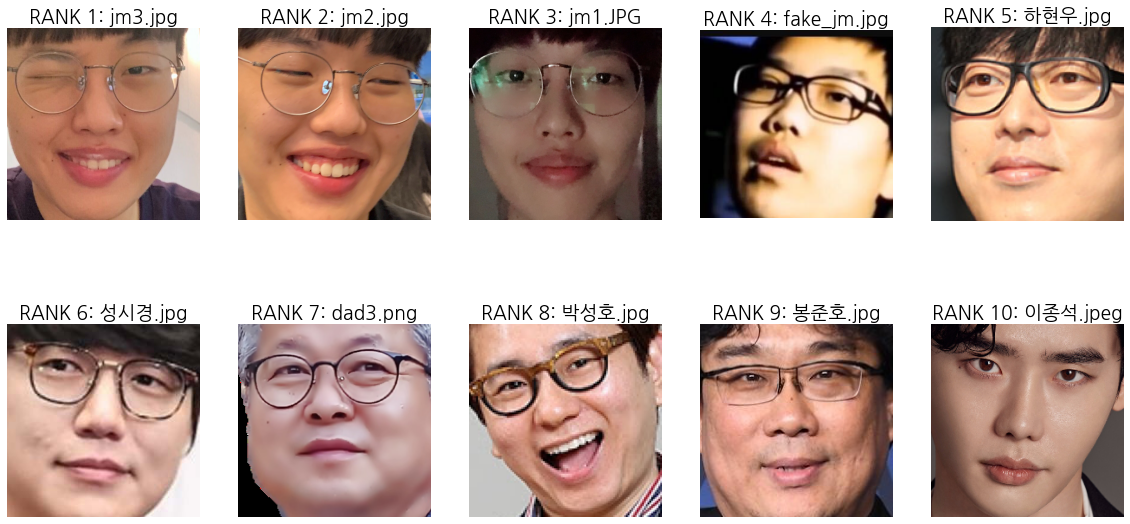

In [20]:
plt.figure(figsize=(20, 10))
plt.rc('font', family='NanumGothic', size=16)

for idx, img_name in enumerate(img_list):
    plt.subplot(2, 5, idx+1)
    image_path = dir_path + '/' + img_name
    cropped_face = get_gropped_face(image_path)
    plt.imshow(cropped_face)
    plt.title(f'RANK {idx + 1}: {img_name}')
    plt.axis('off')

# Discussion

내 사진 4장(jm0 ~ jm3)과 아버지 사진(dad1~dad3), 그리고 슬랙에 영빈님께서 올려주신 남자 사진들 데이터를 기반으로 닮은 꼴 찾기를 진행하였다.또한 주변 친구들이 자꾸 닮았다며 보내주는 이름 모를 남자의 사진(fake_jm)도 넣어보았다. 제발 닮은 꼴로 안나오길 바라며 프로젝트를 진행했다.

닮은 꼴 상위 10개를 뽑아 출력했다. 역시 내 사진은 1,2,3등을 차지하였다. 하지만 fake_jm이 4등한걸 보고 기분이 썩 좋진 않았다ㅎㅎ

아버지는 7등을 차지하셨다. 나는 어머니를 닮았기 때문에 그런가보다 싶었다. 성시경을 제외하고는 단 한번도 닮았다 소리를 듣지 못한 사람들만 있었다. 특히 마지막 10위 이종석은..좀,,, 뭐가 좀 닮았나?ㅎㅎ

아무튼 몇줄 안되는 코드가 꽤나 정확하게(?) 닮은 꼴을 찾아주니 신기했다.